### Understanding DataSet Variables

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables

In [3]:
df = pd.read_csv("D:\Learnings\DataSets\Test Dataset\Vehicles\Vehicles.csv")

In [4]:
df.shape

(423857, 25)

In [6]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [7]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [8]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,year,odometer,county,lat,long
count,423857.000000,423857.000000,328743.000000,270585.000000,0.000000,324404.000000,324404.000000
mean,7190602108.850494,57794.374777,2009.827358,99425.784611,nan,38.731429,-93.949367
std,5159268.778739,10025805.116449,10.135809,120483.312390,nan,5.902977,17.930566
min,7178301636.000000,0.000000,1900.000000,0.000000,nan,-80.386400,-161.394000
25%,7186687550.000000,4499.000000,2007.000000,44324.000000,nan,35.054500,-106.678000
50%,7192067820.000000,9995.000000,2012.000000,91749.000000,nan,39.366900,-88.009900
75%,7194909078.000000,18995.000000,2016.000000,137237.000000,nan,42.517075,-80.832500
max,7197006076.000000,3808256046.000000,2021.000000,10000000.000000,nan,80.383400,115.524000


In [9]:
df.condition.unique()

array(['excellent', 'good', 'fair', nan, 'like new', 'salvage', 'new'],
      dtype=object)

In [12]:
# Reclassify condition column
def clean_condition(row):
    
    good = ['good','fair']
    excellent = ['excellent','like new']       
    
    if row.condition in good:
        return 'good'   
    if row.condition in excellent:
        return 'excellent'    
    return row.condition# Clean dataframe
def clean_df(playlist):
    df_cleaned = df.copy()
    df_cleaned['condition'] = df_cleaned.apply(lambda row: clean_condition(row), axis=1)
    return df_cleaned# Get df with reclassfied 'condition' column
df_cleaned = clean_df(df)
print(df_cleaned.condition.unique())

['excellent' 'good' nan 'salvage' 'new']


## Cleaning Dataset

### Removing Redundant Variables

In [14]:
df_cleaned = df_cleaned.copy().drop(['url','image_url','county'], axis=1)

### Variable Selection

In [18]:
NA_val = df_cleaned.isna().sum()
def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df_cleaned.shape[0]<threshold:
            col_pass.append(i)
    return col_passdf_cleaned == df_cleaned[na_filter(NA_val)]
df_cleaned.columns

Index(['id', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'description', 'state', 'lat', 'long'],
      dtype='object')

### Removing Outliers

In [19]:
df_cleaned = df_cleaned[df_cleaned['price'].between(999.99, 99999.00)]
df_cleaned = df_cleaned[df_cleaned['year'] > 1990]
df_cleaned = df_cleaned[df_cleaned['odometer'] < 899999.00]
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,year,odometer,lat,long
count,235950.000000,235950.000000,235950.000000,235950.000000,234233.000000,234233.000000
mean,7189026980.751342,16286.991507,2011.592299,99819.519627,38.984416,-93.777778
std,4752768.671934,12719.926879,5.622341,66096.821992,5.914886,18.001142
min,7178301636.000000,1000.000000,1991.000000,0.000000,-80.386400,-161.394000
25%,7185450201.000000,6995.000000,2008.000000,47291.000000,35.185100,-106.642000
50%,7189992815.000000,12995.000000,2013.000000,94794.000000,39.632100,-87.397400
75%,7193312992.500000,21500.000000,2016.000000,140000.000000,42.700800,-80.829900
max,7195225072.000000,99999.000000,2021.000000,895137.000000,65.743600,94.163200


### Removing Rows with Null Values

In [20]:
df_cleaned = df_cleaned.dropna(axis=0)
df_cleaned.shape

(27012, 22)

## Analyzing relationships between variables

### Correlation Matrix

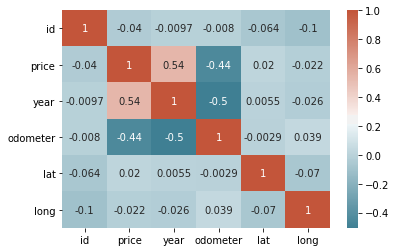

In [21]:
# calculate correlation matrix
corr = df_cleaned.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Scatterplot

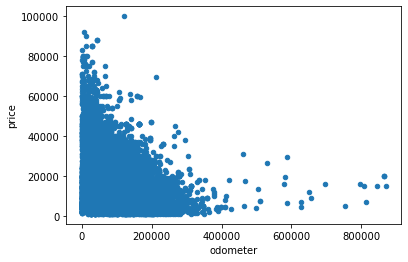

In [22]:
df_cleaned.plot(kind='scatter', x='odometer', y='price')

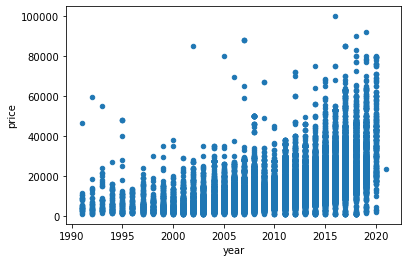

In [23]:
df_cleaned.plot(kind='scatter', x='year', y='price')

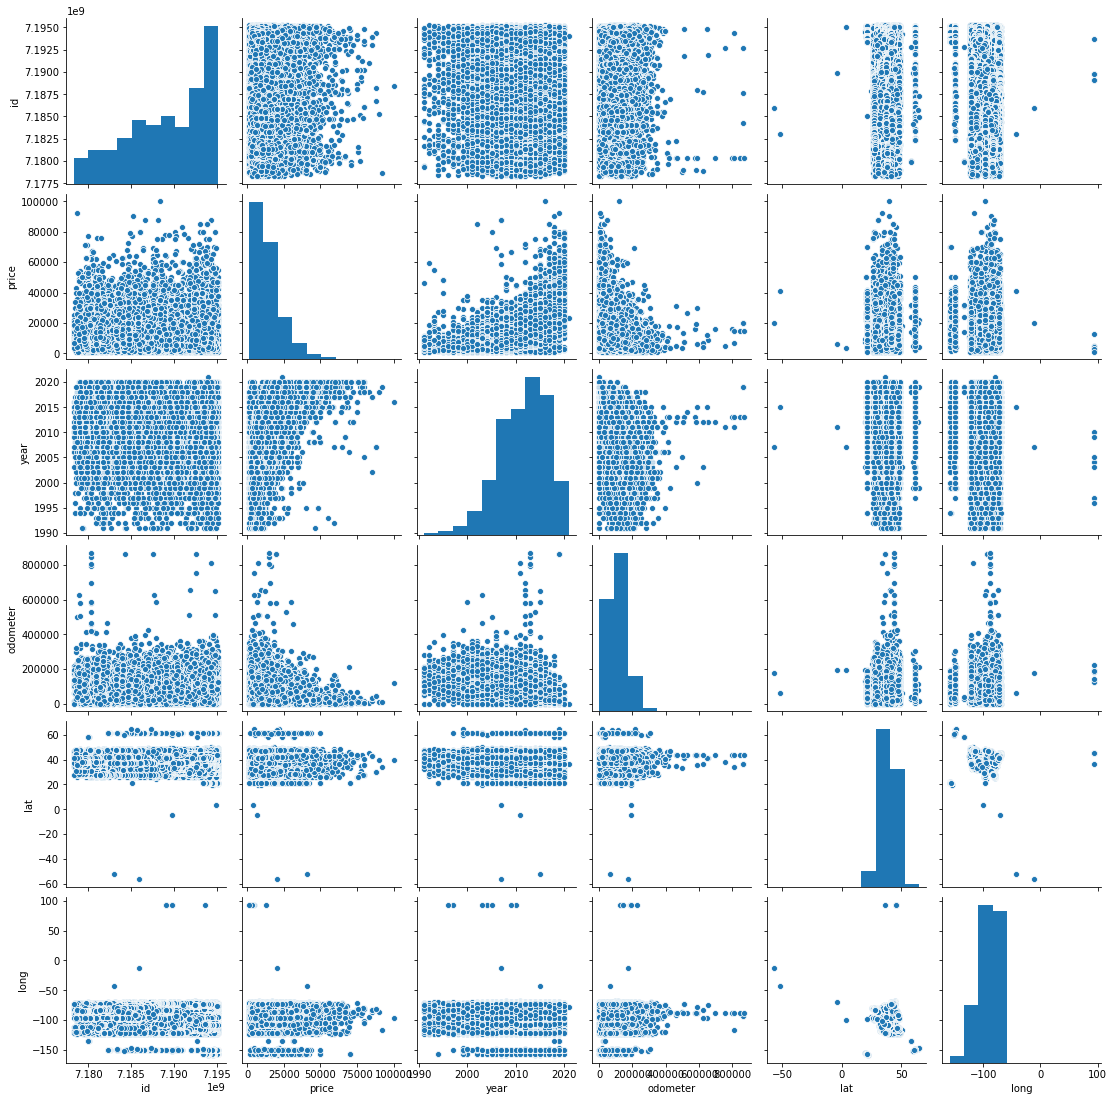

In [24]:
sns.pairplot(df_cleaned)

### Histogram

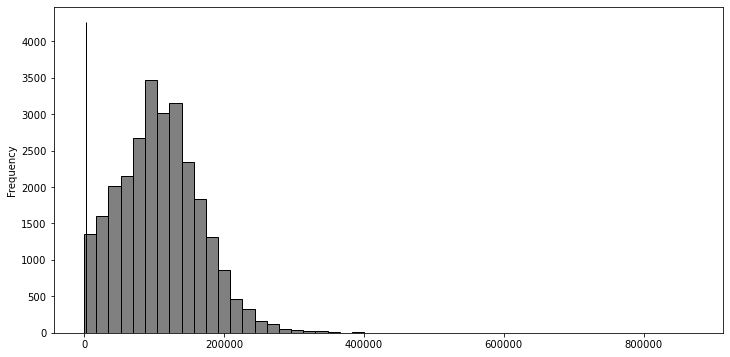

In [27]:
df_cleaned['odometer'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')
df_cleaned['year'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

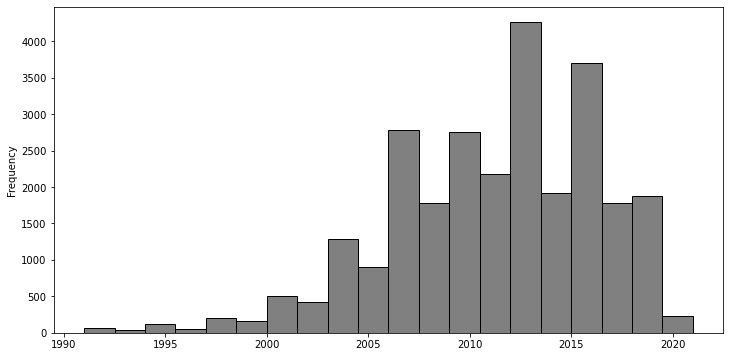

In [28]:
df_cleaned['year'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

### Boxplot

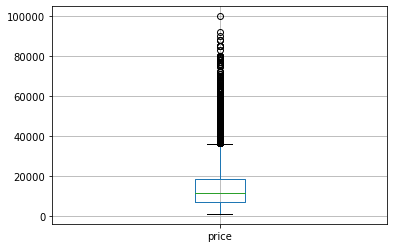

In [29]:
df_cleaned.boxplot('price')

Removing the outliers for price using the interquartile (IQR) method

The IQR, also called the midspread, is a measure of statistical dispersion and can be used to get identify and remove outliers. The theory of the IQR range rule is as follows:

Calculate IQR (= 3rd quartile — 1st quartile)
Find the minimum number of the range (=1st quartile — 1.5 * IQR)
Find the maximum number of the range (=3rd quartile + 1.5 * IQR)
Remove any values that lie outside of this range.

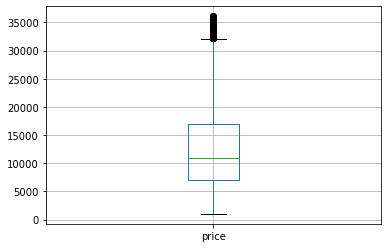

In [30]:
df_cleaned = df_cleaned[df_cleaned['price'].between(999.99, 250000)] # Computing IQR
Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
df_filtered = df_cleaned.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')
df_filtered.boxplot('price')

In [31]:
df_filtered.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,year,odometer,lat,long
count,25828.000000,25828.000000,25828.000000,25828.000000,25828.000000,25828.000000
mean,7189187665.788989,12913.029658,2010.744734,111888.498142,38.736733,-91.273620
std,4680878.445547,7863.914901,5.014580,59622.197972,5.738292,17.331529
min,7178303131.000000,1000.000000,1991.000000,0.000000,-56.527000,-159.366000
25%,7185807658.500000,6950.000000,2007.000000,71743.000000,35.505400,-97.101350
50%,7189874500.500000,10995.000000,2011.000000,108654.000000,39.660200,-86.344200
75%,7193480095.500000,16999.000000,2015.000000,146361.250000,42.484500,-79.587350
max,7195219239.000000,36101.000000,2021.000000,870549.000000,64.830900,94.163200


In [32]:
# cant be newer than 2020
df_filtered = df_filtered[df_filtered['year'].between(1900, 2020)]# = 140000 + 1.5 * (140000-52379)
df_filtered = df_filtered[df_filtered['odometer'].between(0, 271431.5)]

### Dropping Remaining Columns

In [36]:
df_final = df_filtered.copy().drop(['id','region_url','region','description','model','state','paint_color'], axis=1)
df_final.shape


(25601, 15)

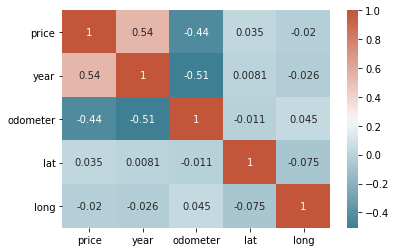

In [37]:
import matplotlib.pylab as plt
import seaborn as sns
# calculate correlation matrix
corr = df_final.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

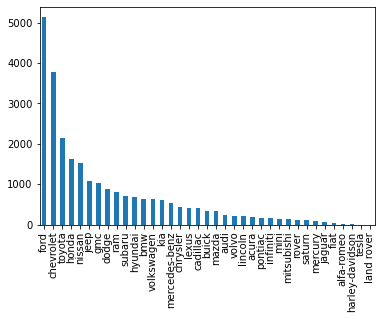

In [40]:
df_final['manufacturer'].value_counts().plot(kind='bar')


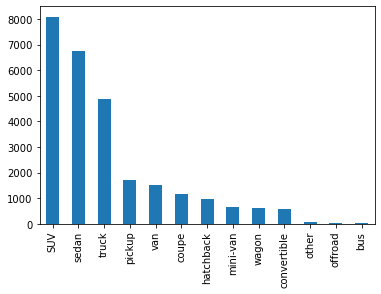

In [41]:
df_cleaned['type'].value_counts().plot(kind='bar')

## Data Modelling

### Dummy Variables

df_final = pd.get_dummies(df_final, drop_first=True)
print(df_final.columns)

### Scaling the data

In [43]:
from sklearn.preprocessing import StandardScaler
X_head = df_final.iloc[:, df_final.columns != 'price']
X = df_final.loc[:, df_final.columns != 'price']
y = df_final['price']
X = StandardScaler().fit_transform(X)

### Creating the model

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

To use the random forest algorithm for a number of reasons:
    
1. It handles high-dimensionality very well since it takes subsets of data.
2. It is extremely versatile and requires very little preprocessing 
3. It is great at avoiding overfitting since each decision tree has low bias 
4. It allows you to check for feature importance, which you’ll see in the next section!

### Checking accuracy of the model

In [47]:
print(mae(y_test, pred))
print(df_final['price'].mean())
model.score(X_test,y_test)

1565.2991985520455
12948.674817389945


0.8814155218355516